In [2]:
library(zoo)
library(ggplot2)
library(dplyr)
library(forecast)
library(dynlm)
library(urca)
library(fUnitRoots)
library(ggfortify)
library(data.table)
library(tseries)
library(dplyr)
library(aTSA)
library(OECD)
library(lmtest)
library(readxl)
library(vars)
library(tsDyn)
library(MTS)

In [3]:
options(repr.plot.width = 20)
options(repr.plot.height = 6)

In [4]:
duom <-read.csv("duomenys.csv", header=T)

In [5]:
unts<- ts(duom$UN,start=c(1968,1),end=c(2018,4), frequency=4)

gdpts <- ts(duom$GDP, start=c(1968,1), end=c(2018,4), frequency = 4)

infts <- ts(duom$INF, start=c(1968,1),end=c(2018,4), frequency=4)
sdiff <- diff(infts,lag = 4)

untsdiff2 <- diff(unts, d = 1, lag = 4)
untsdiff <- diff(unts, d = 1)

In [6]:
decomp1 = stl(unts, s.window="periodic")
deseasonal_ts_unts <- seasadj(decomp1)

In [7]:
decomp2 = stl(infts, s.window="periodic")
deseasonal_ts_inf <- seasadj(decomp2)

___

In [8]:
df10 <- cbind(unts, gdpts, infts)

In [9]:
train10 <- window(df10, start =c(1968,1),end=c(2012,4))
test10 <-window(df10, start=c(2013,1))

In [10]:
VARselect(train10, lag.max = 13, type = "none")

,1,2,3,4,5,6,7,8,9,10,11,12,13
AIC(n),-1.4315092,-2.1470922,-2.1389062,-2.49123434,-2.57026034,-2.5606912,-2.5039029,-2.69308724,-2.68084603,-2.61943515,-2.62024102,-2.62715885,-2.6595663
HQ(n),-1.3633072,-2.0106883,-1.9343004,-2.21842654,-2.22925060,-2.1514795,-2.0264892,-2.14747165,-2.06702849,-1.93741566,-1.87001958,-1.80873546,-1.7729409
SC(n),-1.2634736,-1.8110210,-1.6347995,-1.81909196,-1.73008237,-1.5524776,-1.3276537,-1.34880248,-1.16852568,-0.93907921,-0.77184948,-0.61073171,-0.4751035
FPE(n),0.2389508,0.1168342,0.1178205,0.08286935,0.07662714,0.0774464,0.0820942,0.06807969,0.06909598,0.07371042,0.07394475,0.07378897,0.0718463


Kointegravimo sąryšis

In [11]:
H1 <- ca.jo(train10, ecdet="none", K = 8)
summary(H1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.14064345 0.03705994 0.01459211

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  2.53  6.50  8.18 11.65
r <= 1 |  6.50 12.91 14.90 19.19
r = 0  | 26.07 18.90 21.07 25.75

Eigenvectors, normalised to first column:
(These are the cointegration relations)

          unts.l8  gdpts.l8   infts.l8
unts.l8  1.000000 1.0000000  1.0000000
gdpts.l8 4.923252 0.7624543 -0.4754655
infts.l8 0.212737 2.0780259 -4.9845109

Weights W:
(This is the loading matrix)

            unts.l8    gdpts.l8     infts.l8
unts.d  -0.03013103 -0.03593611 -0.002884850
gdpts.d -0.14138367  0.01409205  0.012739831
infts.d  0.07859709 -0.05592881  0.003012187


In [12]:
Y_VECM <- VECM(train10, lag = 7, r = 1, include = "none", LRinclude = "none")
summary(Y_VECM)

#############
###Model VECM 
#############
Full sample size: 180 	End sample size: 172
Number of variables: 3 	Number of estimated slope parameters 66
AIC -445.4621 	BIC -231.4325 	SSR 264.1065
Cointegrating vector (estimated by 2OLS):
   unts     gdpts      infts
r1    1 -1.244685 -0.5830744


               ECT                 unts -1             gdpts -1           
Equation unts  -0.0009(0.0050)     -0.3160(0.0796)***  -0.0282(0.0273)    
Equation gdpts -0.0039(0.0159)     0.2193(0.2548)      -0.8317(0.0875)*** 
Equation infts -0.0037(0.0086)     -0.1220(0.1383)     0.0467(0.0475)     
               infts -1            unts -2             gdpts -2          
Equation unts  -0.0512(0.0432)     0.0106(0.0839)      -0.0660(0.0345).  
Equation gdpts -0.2483(0.1383).    -0.0128(0.2688)     -0.6339(0.1104)***
Equation infts -0.6018(0.0750)***  -0.0329(0.1458)     0.0496(0.0599)    
               infts -2            unts -3            gdpts -3          
Equation unts  -0.0905(0.0530).    

In [13]:
H1var=vec2var(H1, r=1)

In [14]:
serial.test(H1var,type="BG")


	Breusch-Godfrey LM test

data:  Residuals of VAR object H1var
Chi-squared = 59.849, df = 45, p-value = 0.06828

$serial

	Breusch-Godfrey LM test

data:  Residuals of VAR object H1var
Chi-squared = 59.849, df = 45, p-value = 0.06828



In [15]:
mean(residuals(H1var))

[1] -1.478968e-14

In [16]:
f <- predict(H1var, n.ahead = nrow(test10))

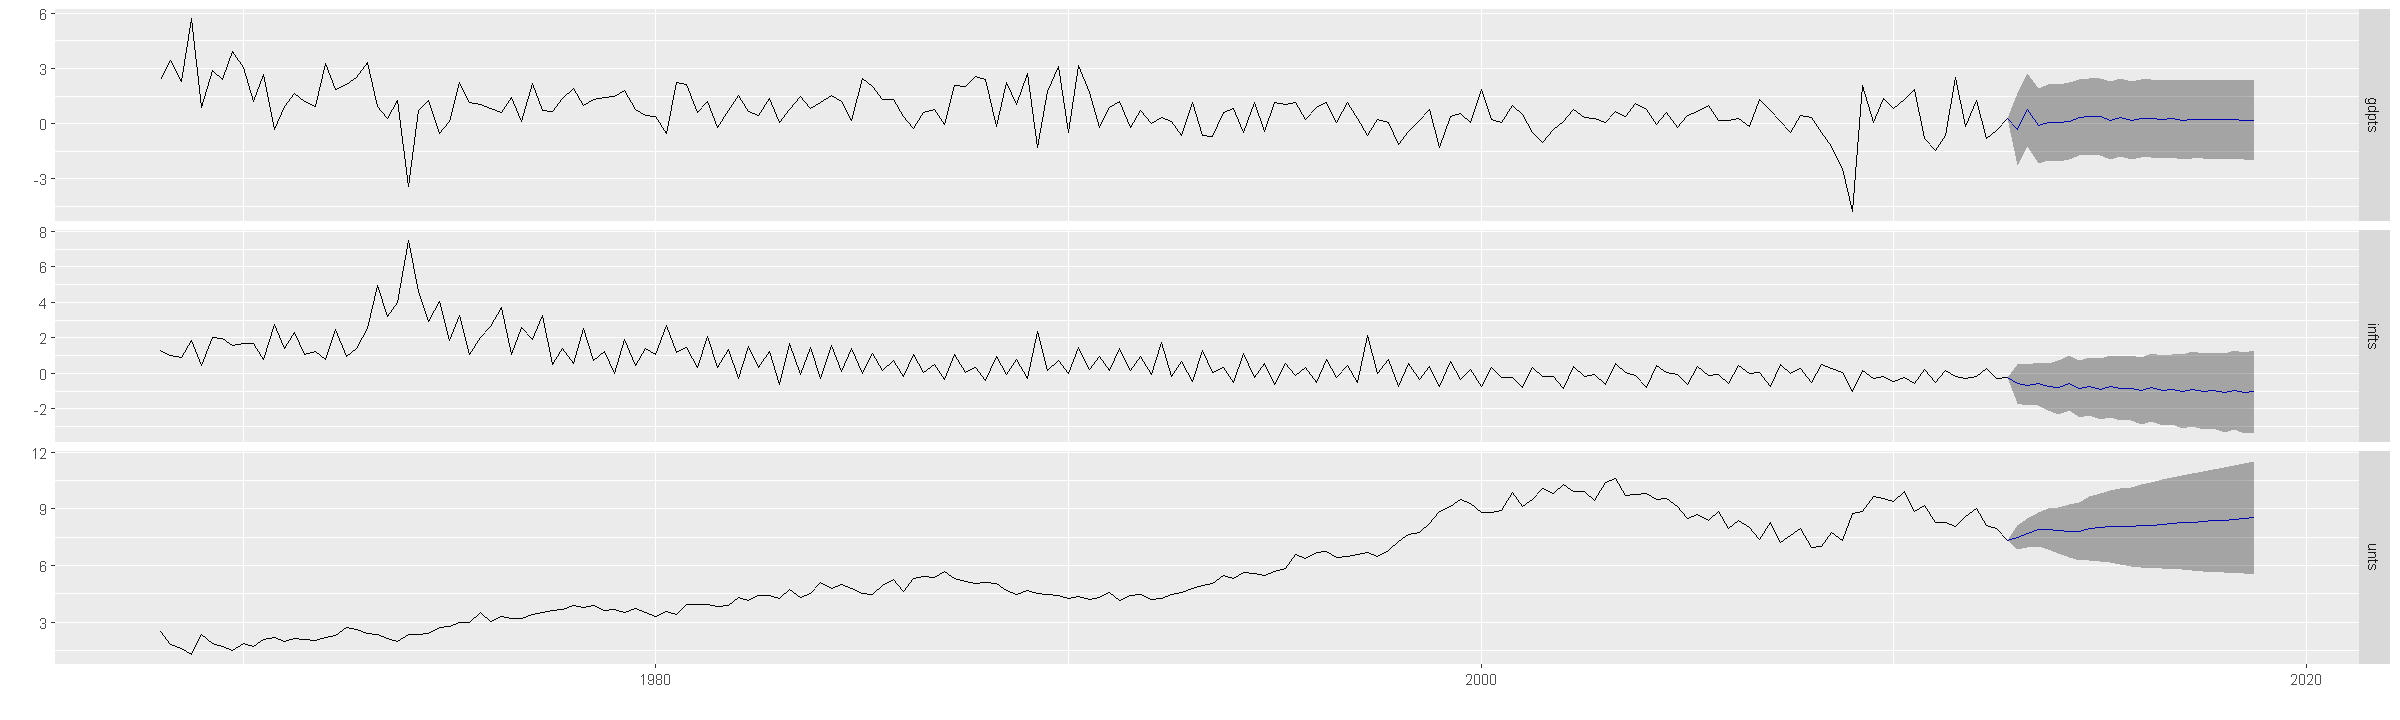

In [17]:
autoplot(f)

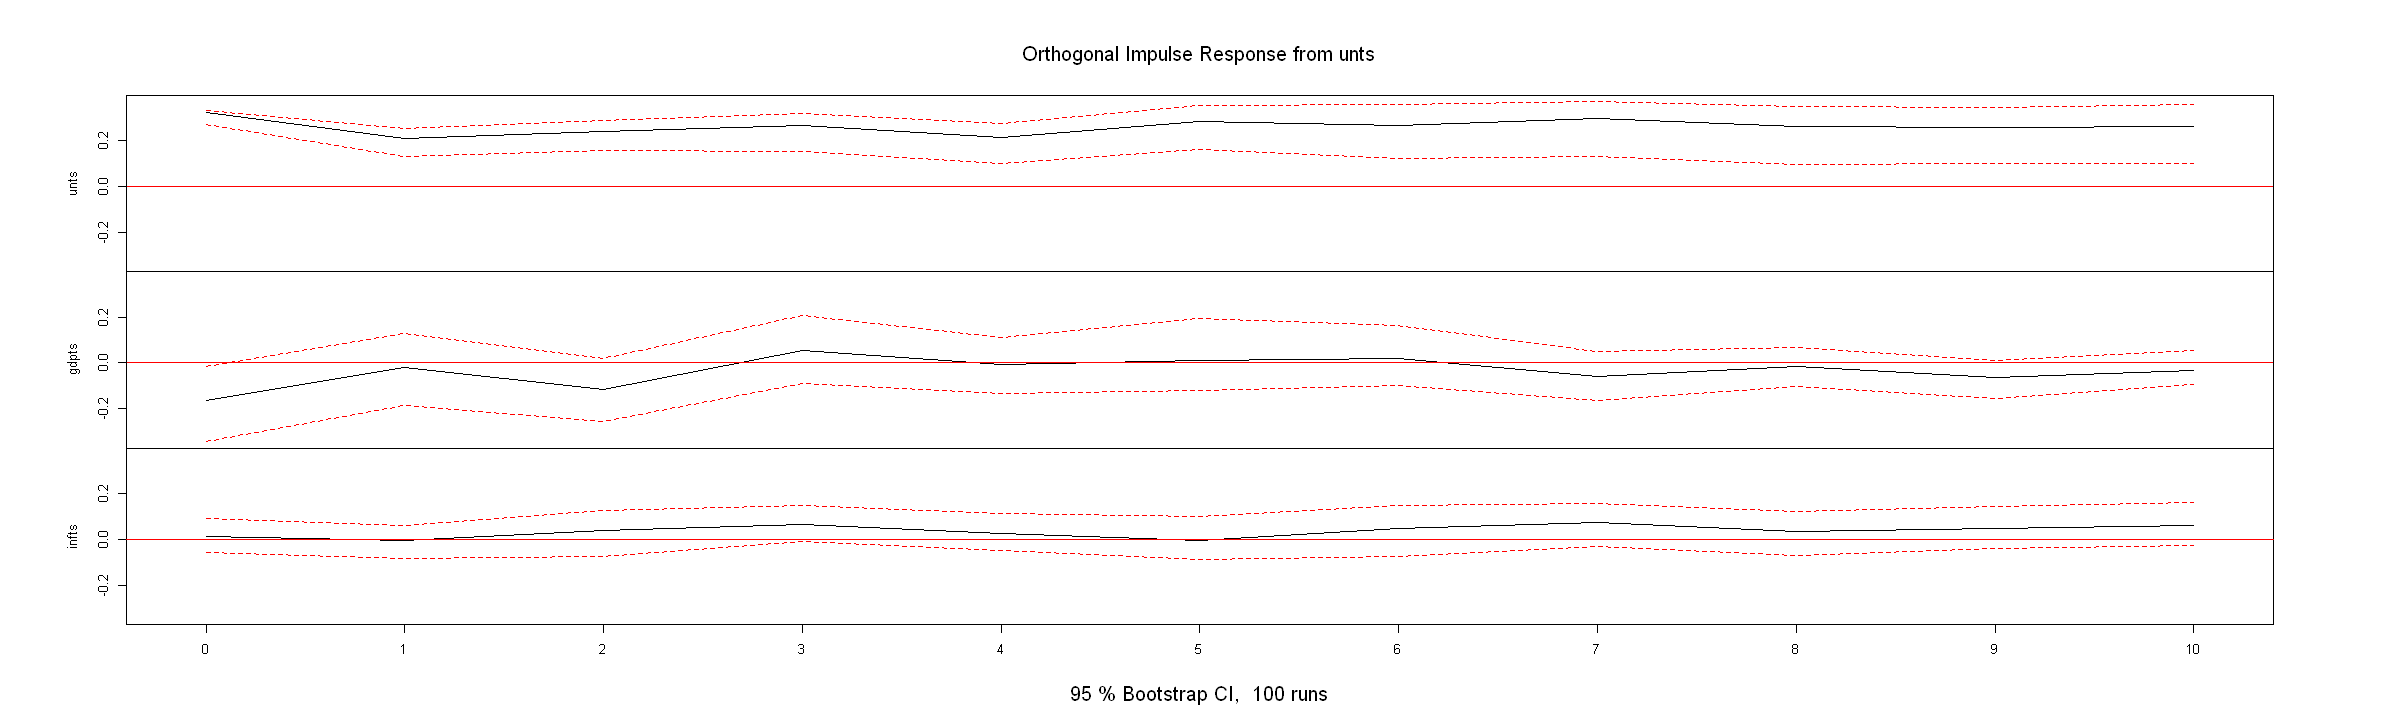

In [18]:
plot(irf(H1var, impulse = "unts"))

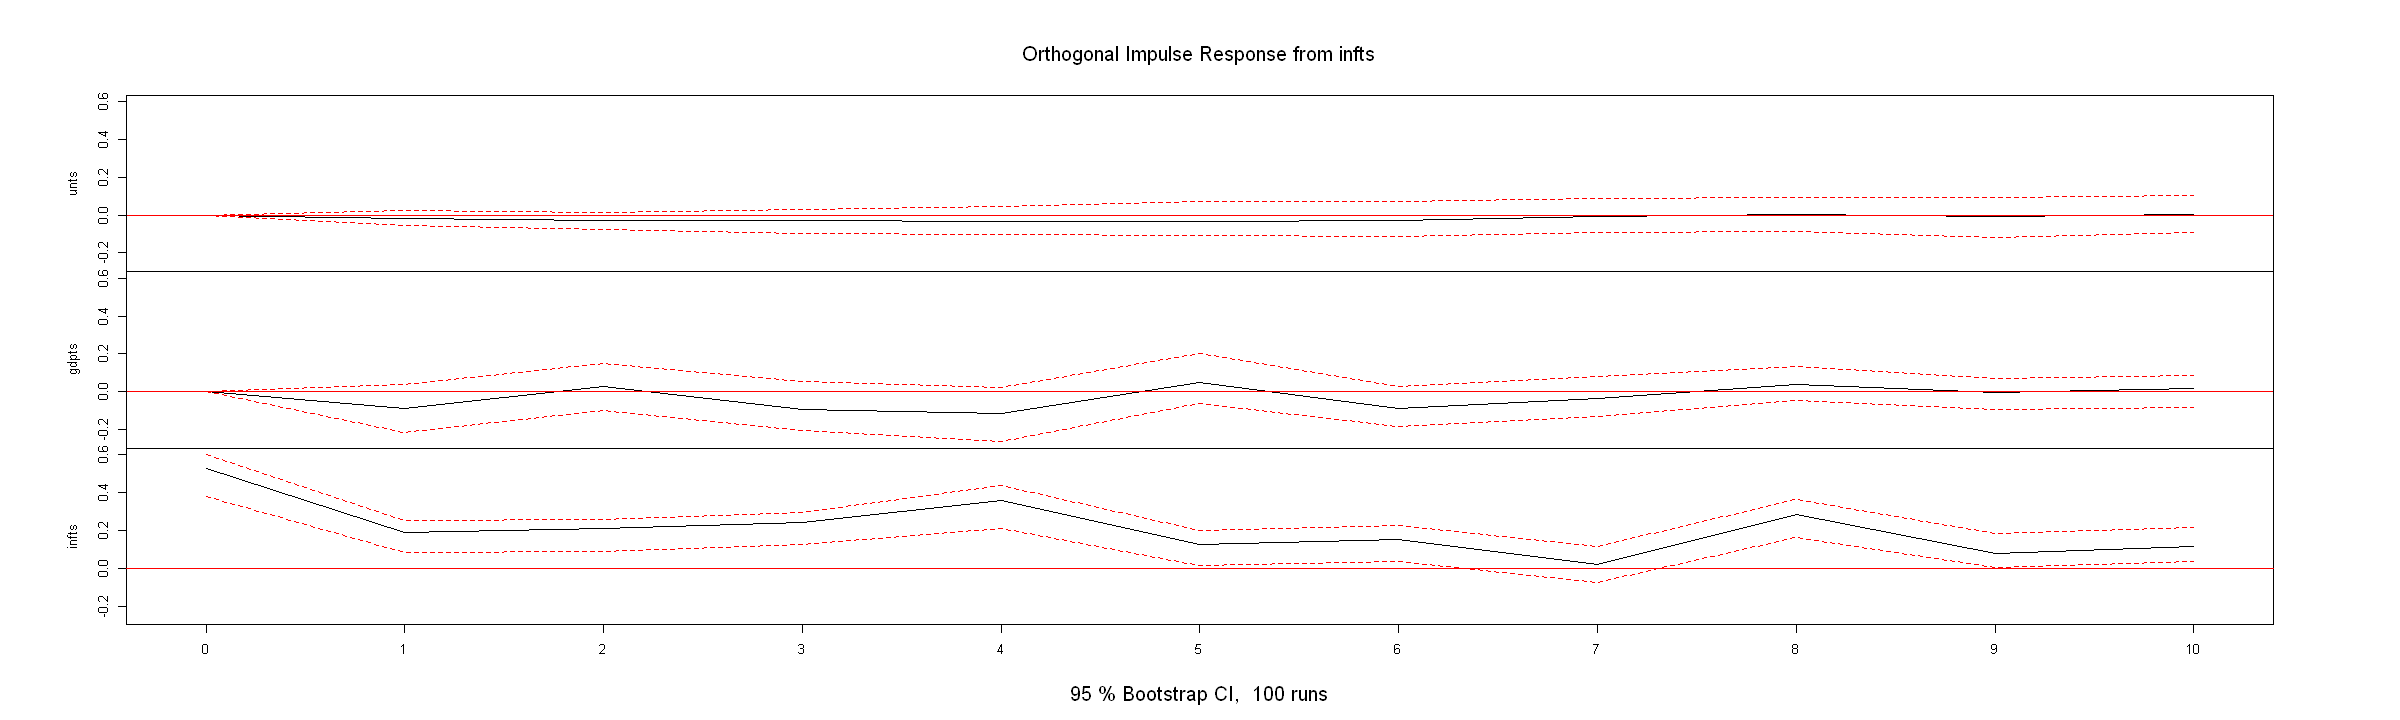

In [19]:
plot(irf(H1var, impulse = "infts"))